# The Street View House Numbers Dataset

## Data Preparation

In [1]:
from torchvision import datasets

In [2]:
data = datasets.SVHN('data', download=True)

Using downloaded and verified file: data/train_32x32.mat


In [3]:
len(data)

73257

In [4]:
data

Dataset SVHN
    Number of datapoints: 73257
    Root location: data
    Split: train

In [5]:
data[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F7A9D1D4AC0>, 1)

### SVM Baseline

In [6]:
small_data = [data[i] for i in range(1000)]

4


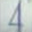

In [7]:
i = 759
print(small_data[i][1])
small_data[i][0]

In [8]:
import numpy as np
np.array(small_data[i][0]).shape, np.array(small_data[i][0])

((32, 32, 3),
 array([[[203, 208, 202],
         [207, 212, 205],
         [206, 211, 207],
         ...,
         [183, 194, 184],
         [189, 202, 187],
         [194, 209, 190]],
 
        [[204, 209, 204],
         [207, 212, 206],
         [206, 212, 208],
         ...,
         [188, 199, 189],
         [194, 207, 191],
         [198, 213, 192]],
 
        [[206, 210, 208],
         [208, 212, 211],
         [207, 212, 211],
         ...,
         [195, 206, 196],
         [202, 215, 199],
         [204, 221, 199]],
 
        ...,
 
        [[178, 182, 183],
         [183, 189, 187],
         [184, 189, 188],
         ...,
         [190, 196, 195],
         [188, 196, 196],
         [182, 192, 191]],
 
        [[174, 181, 181],
         [179, 185, 184],
         [179, 185, 183],
         ...,
         [188, 193, 193],
         [188, 193, 196],
         [180, 190, 189]],
 
        [[173, 179, 179],
         [176, 182, 182],
         [172, 180, 178],
         ...,
         [186,

In [9]:
np.array(small_data[i][0].convert('L')).flatten(), np.array(small_data[i][0].convert('L')).flatten().shape

(array([206, 210, 209, ..., 190, 190, 185], dtype=uint8), (1024,))

In [10]:
def to_np(img):
    return np.array(img.convert('L')).flatten()

In [11]:
to_np(small_data[0][0])

array([ 32,  20,  17, ..., 104, 104, 102], dtype=uint8)

In [12]:
X = np.array([to_np(datum[0]) for datum in small_data])
y = np.array([datum[1] for datum in small_data])

In [13]:
X.shape, X

((1000, 1024),
 array([[ 32,  20,  17, ..., 104, 104, 102],
        [ 76,  76,  75, ..., 104, 102,  97],
        [ 50,  49,  54, ..., 130, 129, 130],
        ...,
        [ 63,  61,  59, ..., 144, 140, 139],
        [124, 123, 121, ...,  71,  57,  50],
        [178, 177, 180, ..., 159, 157, 146]], dtype=uint8))

In [14]:
y.shape, y

((1000,),
 array([1, 9, 2, 3, 2, 5, 9, 3, 3, 1, 3, 3, 2, 8, 7, 4, 4, 1, 2, 8, 1, 6,
        2, 3, 6, 3, 4, 2, 5, 8, 1, 6, 2, 3, 7, 9, 5, 3, 2, 2, 2, 6, 2, 2,
        5, 1, 5, 4, 7, 8, 9, 6, 0, 1, 2, 4, 5, 6, 5, 2, 1, 3, 2, 1, 4, 6,
        3, 8, 4, 3, 1, 4, 4, 2, 6, 4, 4, 1, 1, 1, 7, 3, 1, 2, 0, 4, 2, 2,
        5, 1, 2, 9, 2, 0, 4, 1, 0, 3, 2, 7, 2, 4, 4, 6, 8, 1, 7, 1, 0, 3,
        9, 1, 3, 5, 9, 3, 1, 1, 1, 1, 3, 7, 5, 6, 2, 1, 5, 1, 1, 2, 4, 7,
        5, 3, 2, 4, 3, 2, 9, 5, 8, 9, 5, 1, 0, 5, 4, 2, 4, 4, 3, 1, 2, 3,
        8, 6, 1, 5, 3, 3, 3, 1, 8, 9, 8, 7, 3, 9, 1, 3, 8, 1, 9, 2, 2, 2,
        2, 7, 4, 4, 5, 6, 0, 3, 1, 7, 3, 5, 1, 7, 5, 1, 8, 1, 6, 4, 1, 9,
        3, 3, 5, 1, 7, 1, 2, 1, 0, 4, 4, 1, 8, 3, 6, 1, 2, 0, 2, 1, 0, 9,
        5, 3, 3, 5, 7, 1, 0, 4, 1, 4, 1, 4, 5, 2, 2, 3, 0, 6, 3, 9, 1, 8,
        7, 1, 3, 1, 9, 3, 2, 5, 1, 3, 4, 8, 3, 4, 2, 1, 3, 2, 3, 5, 1, 1,
        3, 5, 8, 1, 7, 6, 5, 6, 4, 1, 0, 8, 8, 1, 3, 6, 8, 4, 1, 7, 4, 9,
        8, 4, 4, 9, 6, 8, 2,

In [15]:
from sklearn.svm import SVC
clf = SVC()

In [16]:
k = 800
clf.fit(X[:k], y[:k])
clf.score(X[k:], y[k:])

0.19

In [23]:
X_norm = (X - X.mean()) / X.std()
clf.fit(X_norm[:k], y[:k])
clf.score(X_norm[k:], y[k:])

0.19

In [41]:
def to_np(img):
    return np.array(img.convert('L')).flatten()

from sklearn.svm import SVC
def classify(data, clf):
    X = np.array([to_np(datum[0]) for datum in data])
#     X = (X - X.mean()) / X.std()
    y = np.array([datum[1] for datum in data])
    
    k = int(len(y) * 0.8)
    clf.fit(X[:k], y[:k])
    train_acc = clf.score(X[:k], y[:k])
    test_acc = clf.score(X[k:], y[k:])
    print(f'Size of X: {X.shape}')
    print(f'Size of y: {len(y)}')
    print(f'Train accuracy: {train_acc}')
    print(f'Test accuracy: {test_acc}')

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rfc = RandomForestClassifier(n_jobs=-1)
classify(small_data, rfc)

Size of X: (1000, 1024)
Size of y: 1000
Train accuracy: 1.0
Test accuracy: 0.33


In [44]:
svm = SVC()
classify(small_data, svm)

Size of X: (1000, 1024)
Size of y: 1000
Train accuracy: 0.3825
Test accuracy: 0.19


In [45]:
logreg = LogisticRegression(n_jobs=-1)
classify(small_data, logreg)

Size of X: (1000, 1024)
Size of y: 1000
Train accuracy: 0.49
Test accuracy: 0.14


In [46]:
classify(data, rfc)

Size of X: (73257, 1024)
Size of y: 73257
Train accuracy: 0.9999829366095043
Test accuracy: 0.7196969696969697


In [ ]:
#classify(data, svm)

In [ ]:
classify(data, logreg)

## Simple Convnet

In [ ]:
import torch

import torch

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.SVHN(root='./data', split='train',
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.SVHN(root='./data', split='test',
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Using downloaded and verified file: ./data/train_32x32.mat


In [42]:
trainset

Dataset SVHN
    Number of datapoints: 73257
    Root location: ./data
    Split: train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [46]:
dataiter = iter(trainloader)
next(dataiter)

[tensor([[[[ 0.0745,  0.0745,  0.0745,  ..., -0.0275, -0.0275, -0.0118],
           [ 0.0824,  0.0902,  0.0902,  ..., -0.0275, -0.0196, -0.0196],
           [ 0.0824,  0.0745,  0.0588,  ..., -0.0431, -0.0353, -0.0275],
           ...,
           [-0.7333, -0.7176, -0.7176,  ..., -0.0745, -0.0510, -0.0275],
           [-0.6784, -0.6627, -0.6706,  ..., -0.0824, -0.0745, -0.0431],
           [-0.5765, -0.5216, -0.5451,  ..., -0.0980, -0.0824, -0.0510]],
 
          [[-0.0588, -0.0510, -0.0510,  ..., -0.0902, -0.0902, -0.1059],
           [-0.0510, -0.0431, -0.0431,  ..., -0.0980, -0.1059, -0.1137],
           [-0.0510, -0.0667, -0.0745,  ..., -0.1294, -0.1216, -0.1216],
           ...,
           [-0.7020, -0.7020, -0.7098,  ..., -0.1216, -0.1059, -0.0824],
           [-0.6627, -0.6471, -0.6627,  ..., -0.1294, -0.1216, -0.1059],
           [-0.5843, -0.5373, -0.5608,  ..., -0.1451, -0.1294, -0.1137]],
 
          [[-0.1922, -0.1686, -0.1529,  ..., -0.2706, -0.2549, -0.2314],
           [-

In [50]:
len(next(dataiter)[1])
# Data loader gives batch of 32 observations

32

In [9]:
trainset[0][0].shape

torch.Size([3, 32, 32])

In [36]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 20, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(20, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

net.to(device)

cuda:0


Net(
  (conv1): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [37]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [41]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

AttributeError: 'int' object has no attribute 'to'

In [39]:
PATH = './svhn.pth'
torch.save(net.state_dict(), PATH)

In [40]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
#         images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 88 %
